In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans

# Domain – Automotive 
## focus –  Incentivize drivers 

In [54]:
driver = pd.read_csv('driver-data.csv')
driver.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [55]:
driver.shape

(4000, 3)

In [56]:
driver.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [57]:
driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.8 KB


In [58]:
driver.dtypes

id                        int64
mean_dist_day           float64
mean_over_speed_perc      int64
dtype: object

In [59]:
len(driver.id.unique())

4000

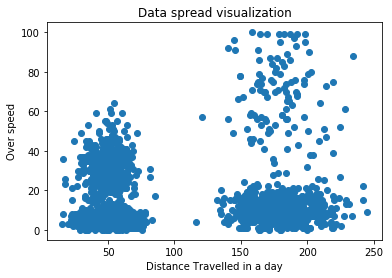

In [60]:
plt.scatter(driver.mean_dist_day,driver.mean_over_speed_perc)
plt.xlabel('Distance Travelled in a day')
plt.ylabel('Over speed')
plt.title("Data spread visualization")
plt.show()

In [61]:
X = np.array(list(zip(driver.mean_dist_day,driver.mean_over_speed_perc)))
X

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

In [62]:
train,test = train_test_split(X,test_size = 0.2 , random_state = 85)

In [63]:
train.shape

(3200, 2)

In [64]:
test.shape

(800, 2)

In [65]:
model = KMeans(n_clusters=4)
model.fit(train)
pred_output = model.predict(test)

In [66]:
pred_output

array([1, 1, 1, 1, 1, 1, 3, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       1, 0, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 3, 3, 0, 2, 1, 1, 1, 1, 0, 1, 3, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0,
       1, 0, 3, 3, 1, 0, 1, 1, 0, 1, 0, 1, 1, 3, 1, 0, 1, 1, 2, 1, 0, 1,
       1, 0, 3, 1, 0, 3, 0, 1, 0, 1, 0, 1, 1, 0, 1, 3, 3, 1, 1, 1, 1, 1,
       1, 3, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 2, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 3, 1, 3,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 3,
       0, 3, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 3, 0,
       1, 1, 1, 1, 0, 3, 0, 0, 2, 1, 1, 1, 1, 0, 1,

In [67]:
centroids = pd.DataFrame(model.cluster_centers_,columns=['X','Y'])
centroids

,X,Y
0,180.347238,10.732965
1,49.892178,5.209354
2,177.084557,72.683544
3,50.442733,32.072072


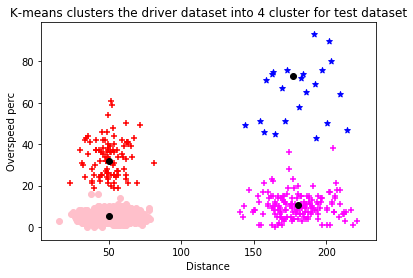

In [74]:
for i in range(0,len(pred_output)):
    if pred_output[i] == 0:
        c1 = plt.scatter(test[i][0],test[i][1],c='magenta',marker='+',label='Cluster1')
    elif pred_output[i] == 1:
        c2 = plt.scatter(test[i][0],test[i][1],c='pink',marker='o',label='Cluster2')
    elif pred_output[i] == 2:
        c3 = plt.scatter(test[i][0],test[i][1],c='blue',marker='*',label='Cluster3')
    elif pred_output[i] == 3:
        c4 = plt.scatter(test[i][0],test[i][1],c='red',marker='+',label='Cluster4')
plt.scatter(centroids.X,centroids.Y,c='black',label='Centroids')
plt.xlabel('Distance')
plt.ylabel('Overspeed perc')
plt.title('K-means clusters for test dataset into 4 clusters')
plt.show() 

In [69]:
model.labels_

array([1, 1, 0, ..., 0, 1, 3])